<a href="https://colab.research.google.com/github/PiyawatFrom/practices/blob/main/DMProjectDay_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Care Cost Prediction**

**Ideas of what you could do with this dataset:**

1. Find Correlation between BMI and charges
2. Predicting Cost of Health Care

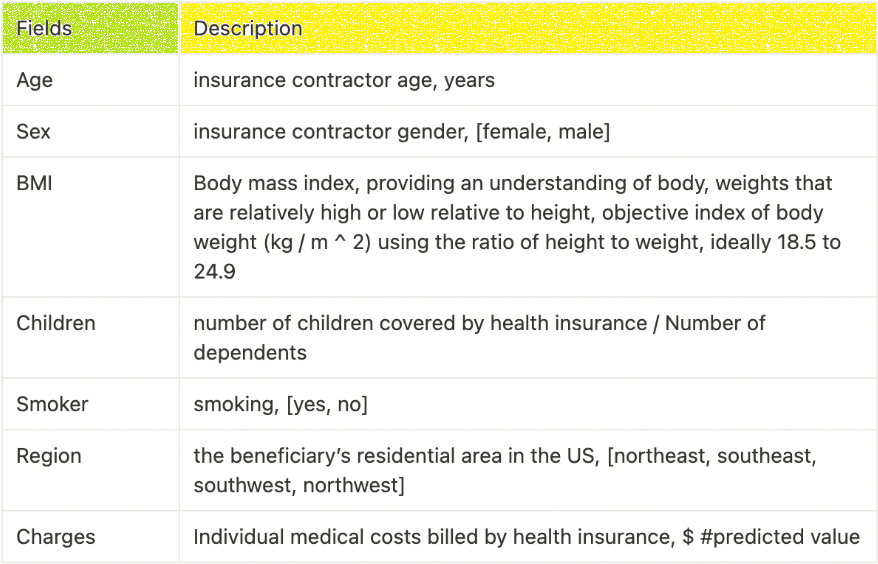

[Introduction to Regression in Python with PyCaret](https://towardsdatascience.com/introduction-to-regression-in-python-with-pycaret-d6150b540fc4#:~:text=PyCaret's%20Regression%20module%20(%20pycaret.,any%20number%20which%20is%20continuous.)

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hc_path = 'drive/MyDrive/Data Master Class/Project Day /Healthcare_DataSet/Healthcare/healthcare_cost.csv'
hc_cost = pd.read_csv(hc_path)

## **เช็คลักษณะข้อมูลในแต่ละ columns**

In [ ]:
hc_cost.shape

(1338, 7)

In [ ]:
hc_cost.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
hc_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#เช็คสมาชิก
cat_col = list(hc_cost.select_dtypes(include="O").columns) #เลือก columns ที่เป็น object มาสร้าง list
for item in cat_col :
    print(item,':',hc_cost[item].unique())

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
hc_cost.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
# plt.rcParams.update({'font.size': 18})

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# from PIL import Image
# import os

# min_size = (300, 300)

# # path to the folder containing the images
# img_folder = '/path/to/folder'

# # loop through all the images in the folder
# for filename in os.listdir(img_folder):
#     if filename.endswith('.jpg') or filename.endswith('.png'):

#         # open the image file
#         img_path = os.path.join(img_folder, filename)
#         img = Image.open(img_path)

#         # resize the image if it is smaller than the minimum size
#         if img.size[0] < min_size[0] or img.size[1] < min_size[1]:
#             img = img.resize(min_size, resample=Image.BICUBIC)

#             # save the resized image
#             img.save(img_path)

In [ ]:
mean_type = {"marker":"o","markerfacecolor":"white","markeredgecolor":"black"}

<Axes: xlabel='charges'>

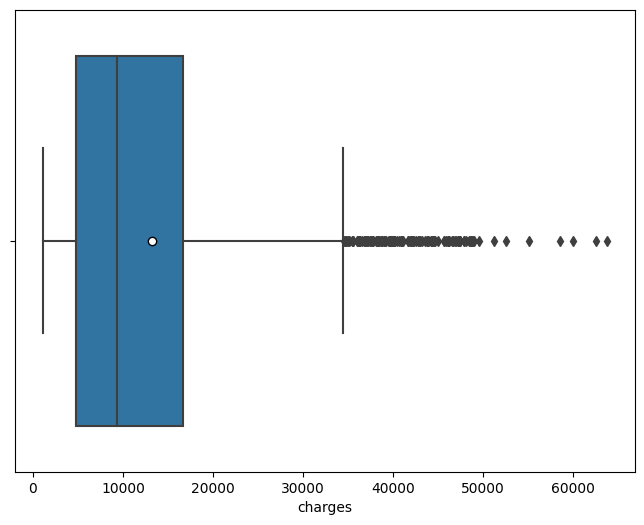

In [ ]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='charges',data=hc_cost,showmeans = True, meanprops = mean_type)

<Axes: ylabel='Frequency'>

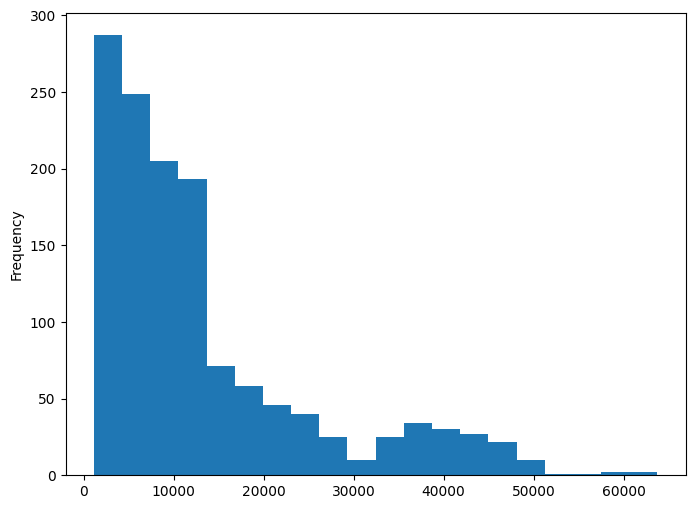

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['charges'].plot.hist(bins=20)

<Axes: xlabel='age'>

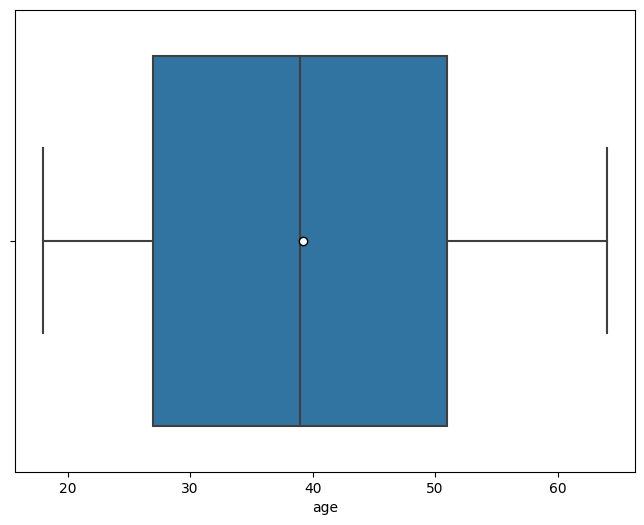

In [ ]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='age',data=hc_cost,showmeans = True, meanprops = mean_type)

<Axes: ylabel='Frequency'>

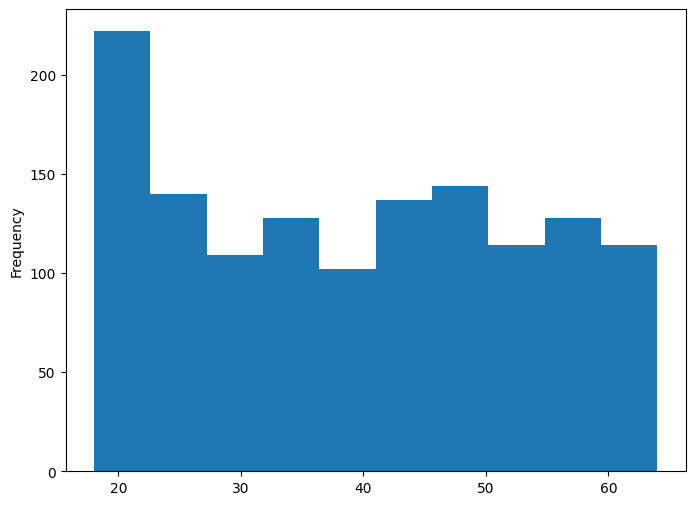

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['age'].plot.hist()

<Axes: xlabel='bmi'>

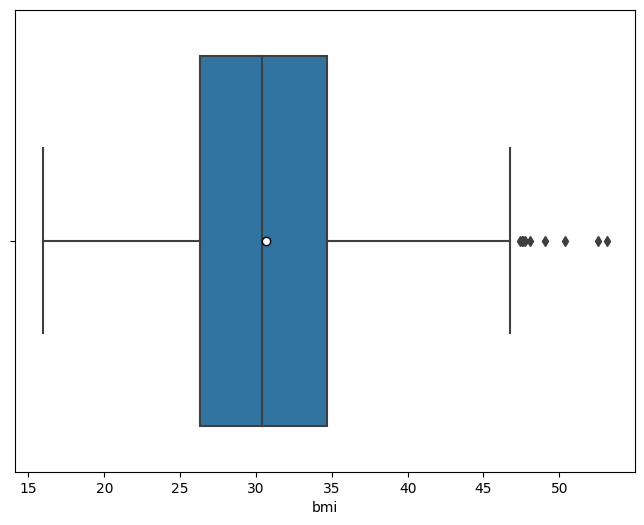

In [ ]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='bmi',data=hc_cost,showmeans = True, meanprops = mean_type)

<Axes: ylabel='Frequency'>

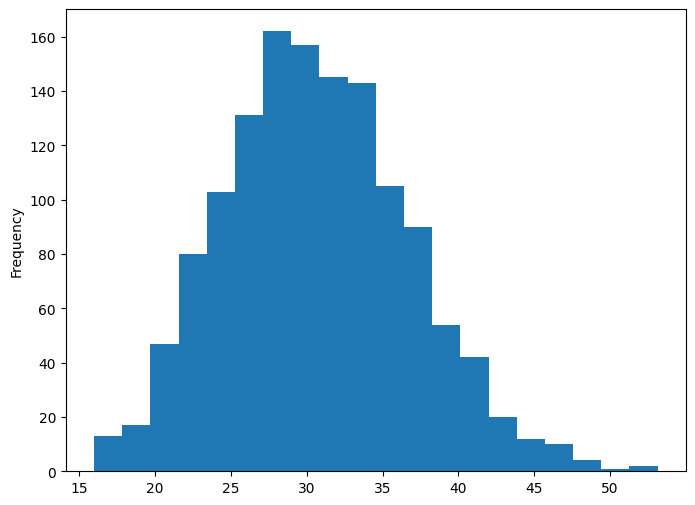

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['bmi'].plot.hist(bins=20)

<Axes: >

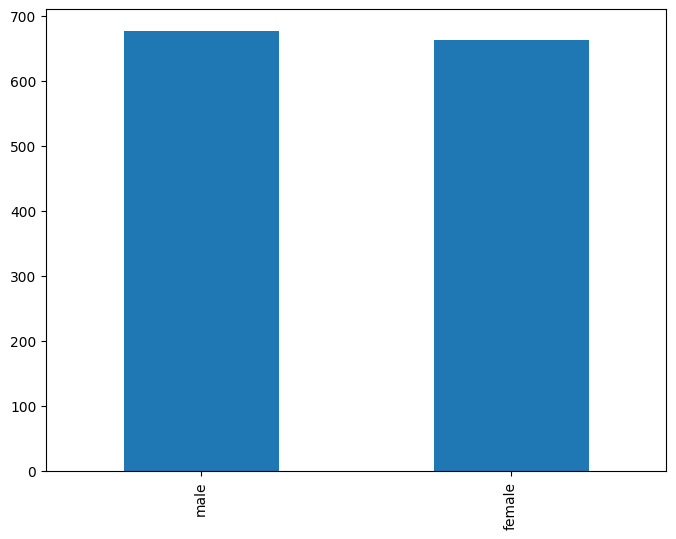

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['sex'].value_counts().plot.bar()

<Axes: >

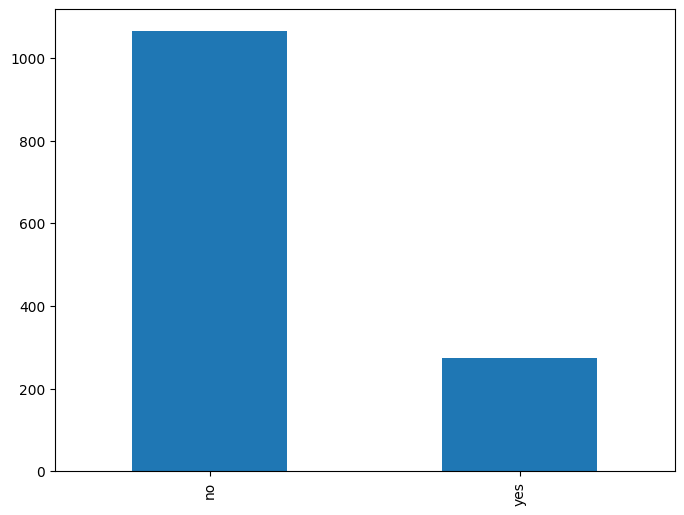

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['smoker'].value_counts().plot.bar()

<Axes: >

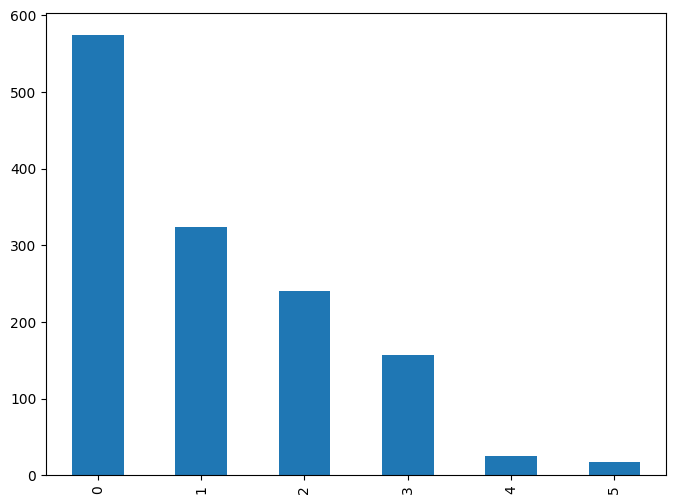

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['children'].value_counts().plot.bar()

In [ ]:
hc_cost['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: >

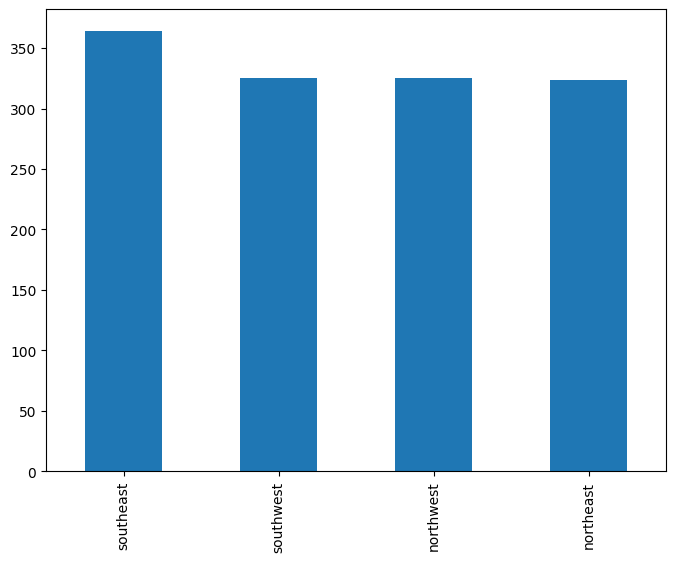

In [ ]:
plt.subplots(figsize=(8, 6))
hc_cost['region'].value_counts().plot.bar()

ข้อมูลค่อนข้างสวย ไม่มีค่าว่าง ข้อมูลผิดพลาด และ ชื่อที่เขียนผิด

แต่ทางด้าน charges ข้อมูลมี outlier เยอะ และเบ้ขวาค่อนข้างชัดเจน

## **ดูความสัมพันธ์เบื้องต้น**

### **ดูภาพรวม**

In [ ]:
df = hc_cost.copy()

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for item in cat_col :
    df[item]= label_encoder.fit_transform(df[item])
    print(item,':',df[item].unique(),',',hc_cost[item].unique())

sex : [0 1] , ['female' 'male']
smoker : [1 0] , ['yes' 'no']
region : [3 2 1 0] , ['southwest' 'southeast' 'northwest' 'northeast']


<Axes: >

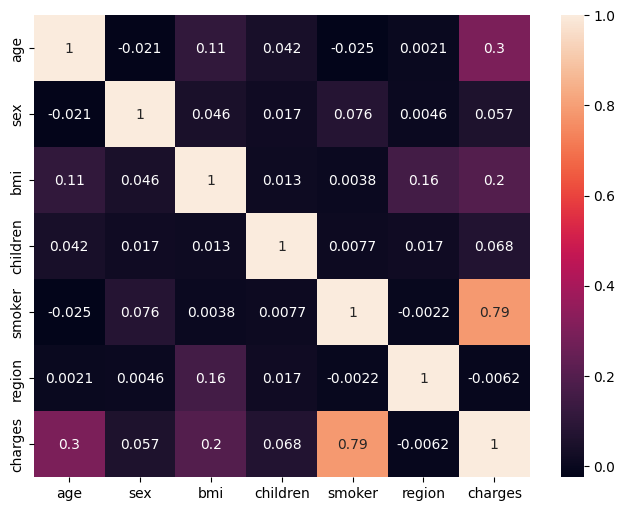

In [ ]:
cmat = df.corr()
plt.subplots(figsize=(8, 6))
sns.heatmap(cmat, annot=True)

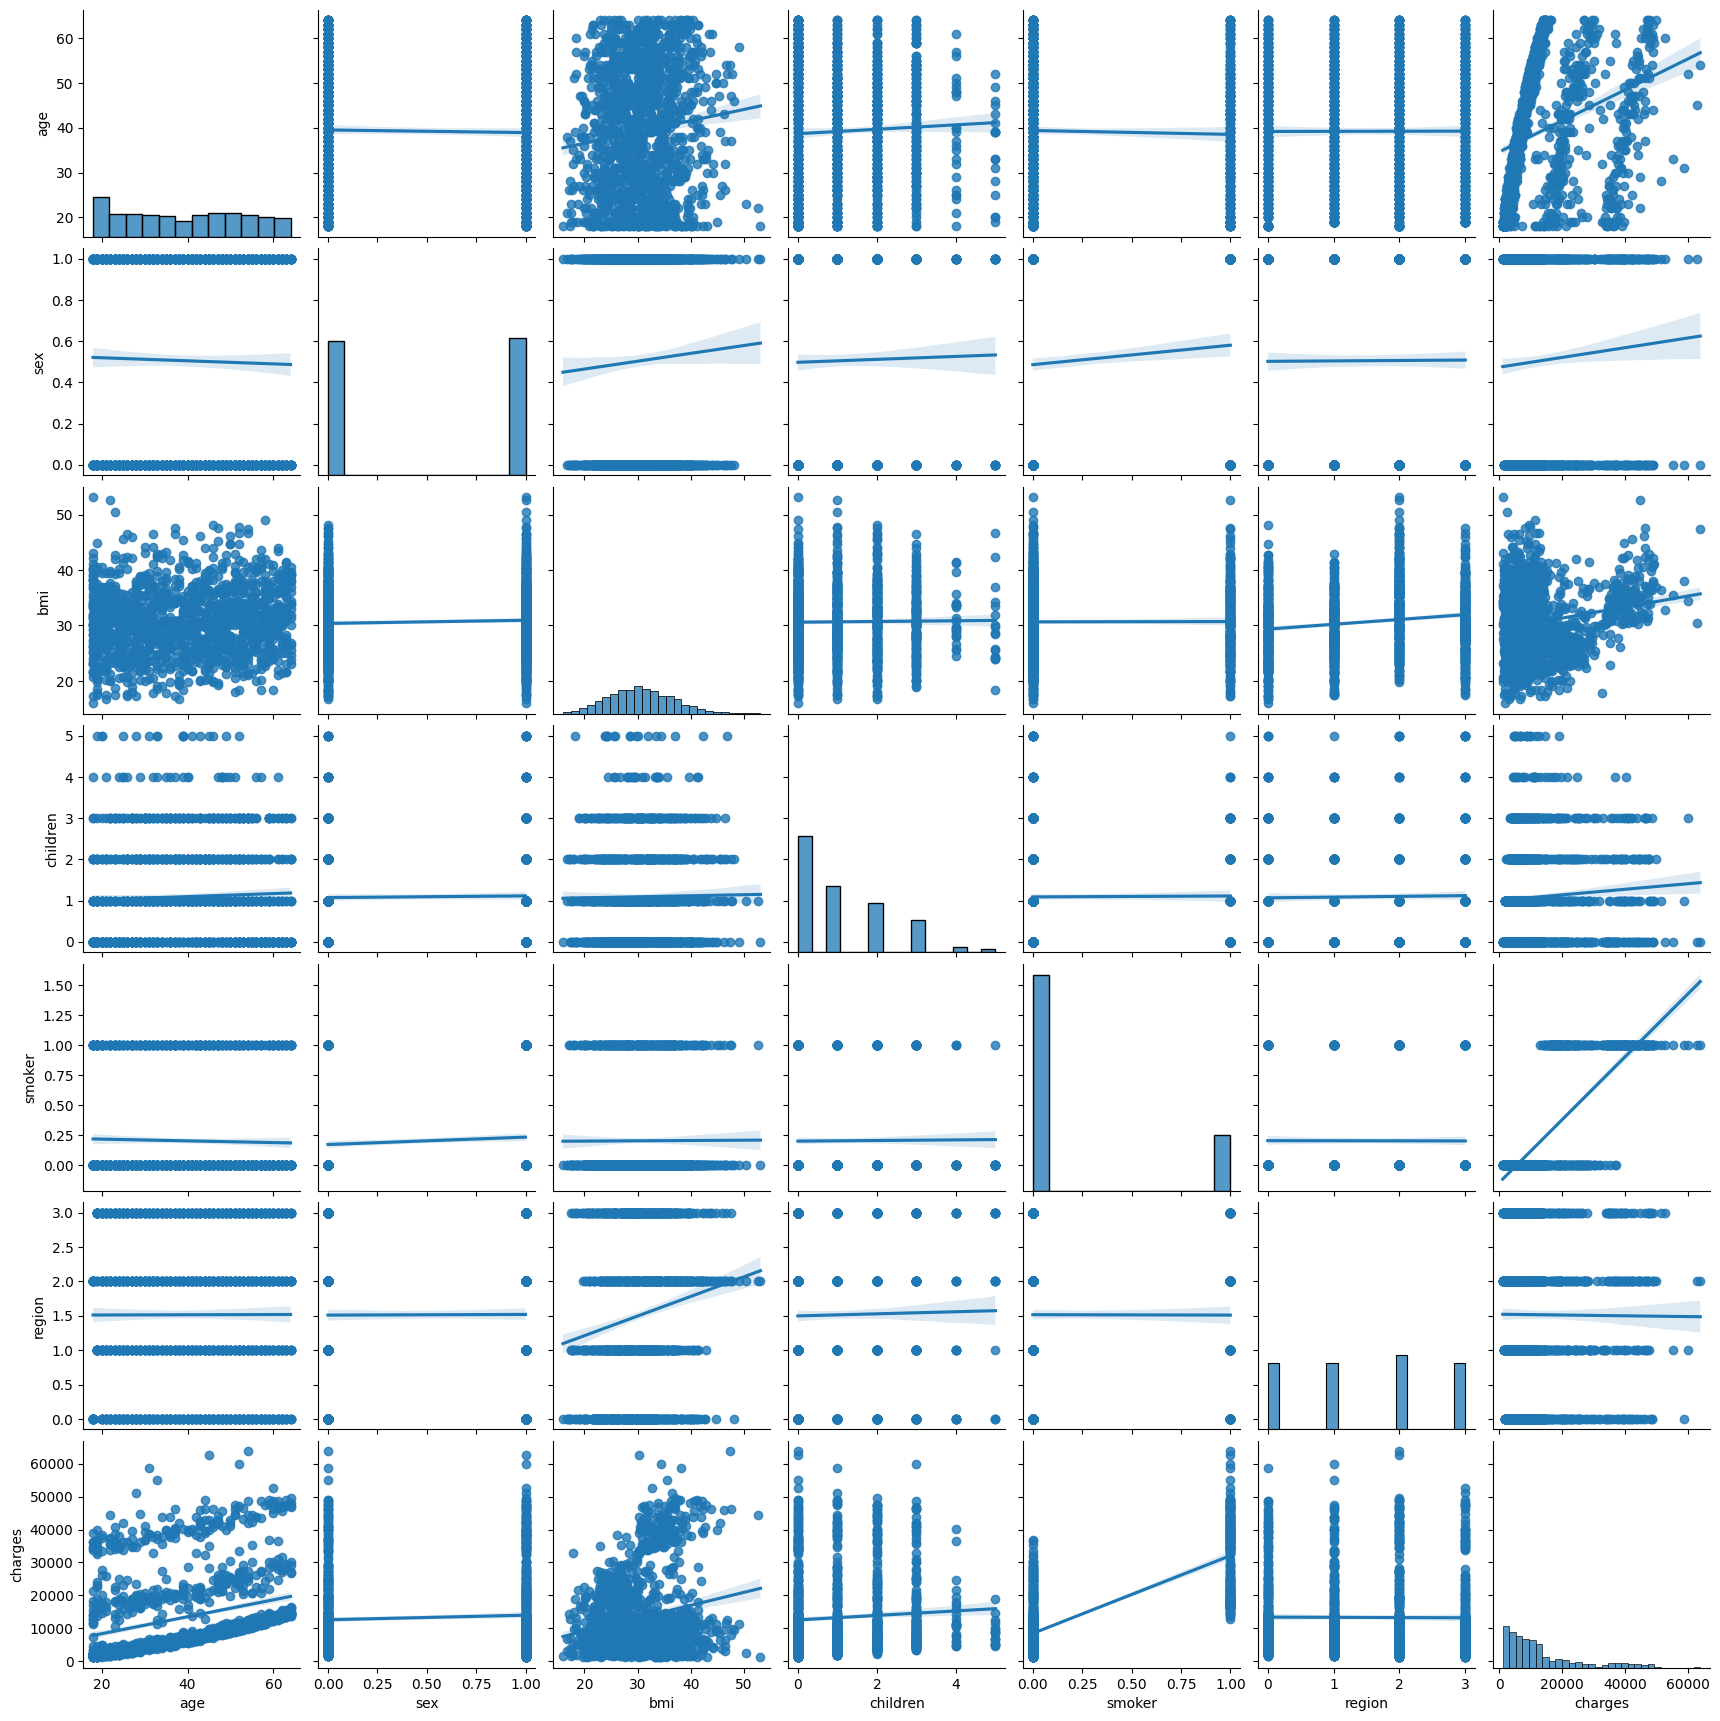

In [ ]:
sns.pairplot(df,kind='reg')

### **ดูแยกตามประเภท**

In [ ]:
num_col = ['age','bmi','children','charges']

<Axes: >

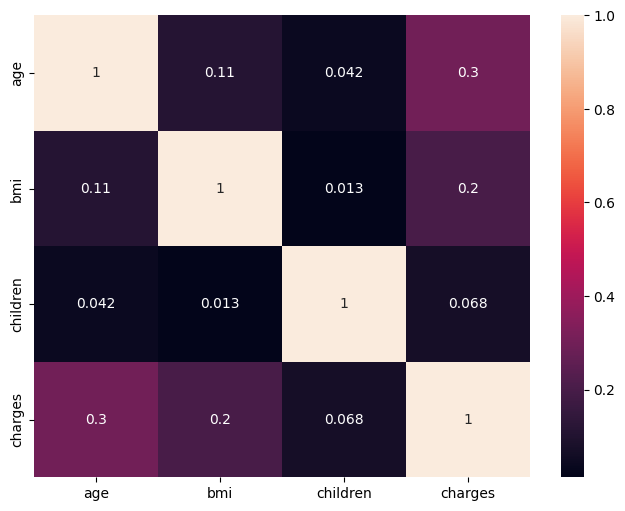

In [ ]:
cmat = hc_cost[num_col].corr()
plt.subplots(figsize=(8, 6))
sns.heatmap(cmat, annot=True)

 Correlation between BMI and charges = 0.2 (คำถาม)

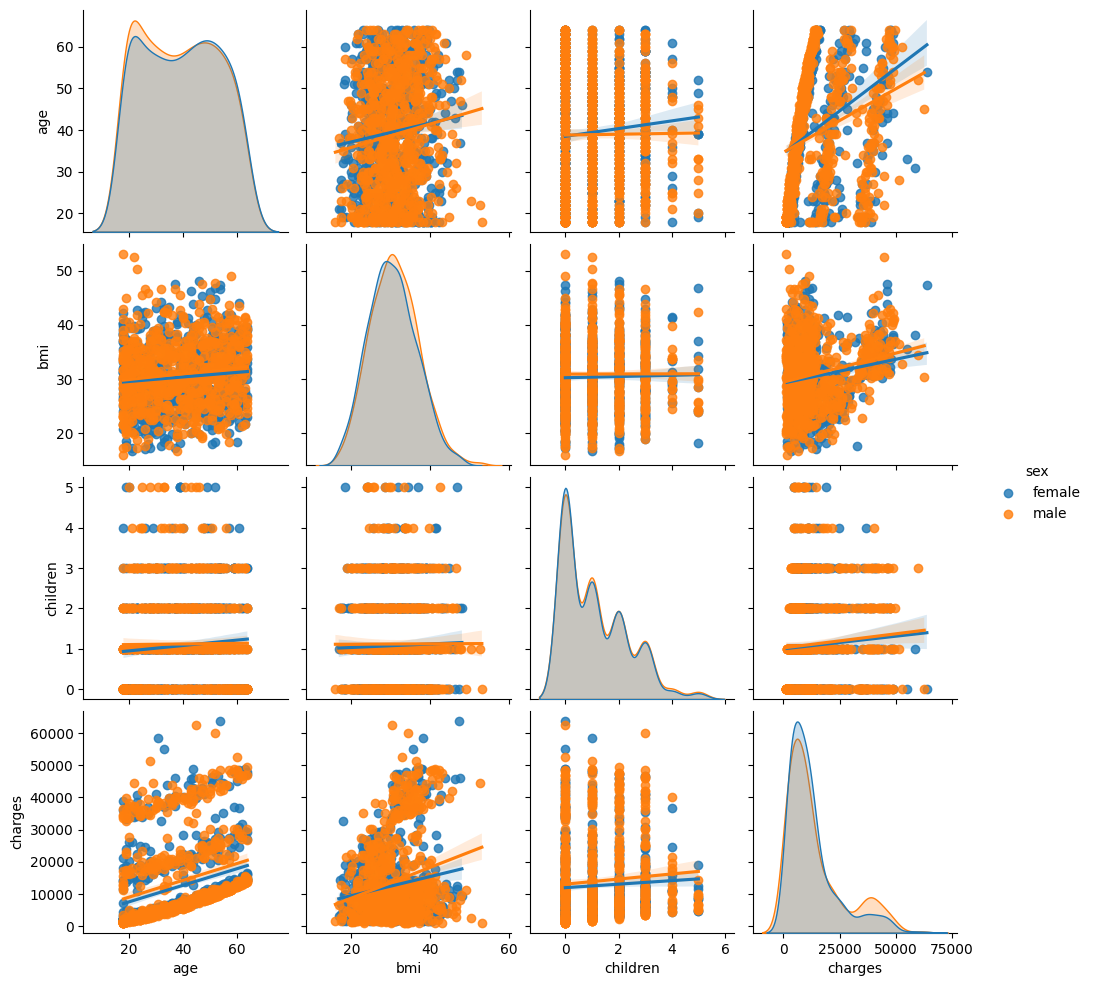

In [ ]:
#แบ่งตามเพศ
sns.pairplot(data=hc_cost,kind='reg',vars=num_col,hue='sex')

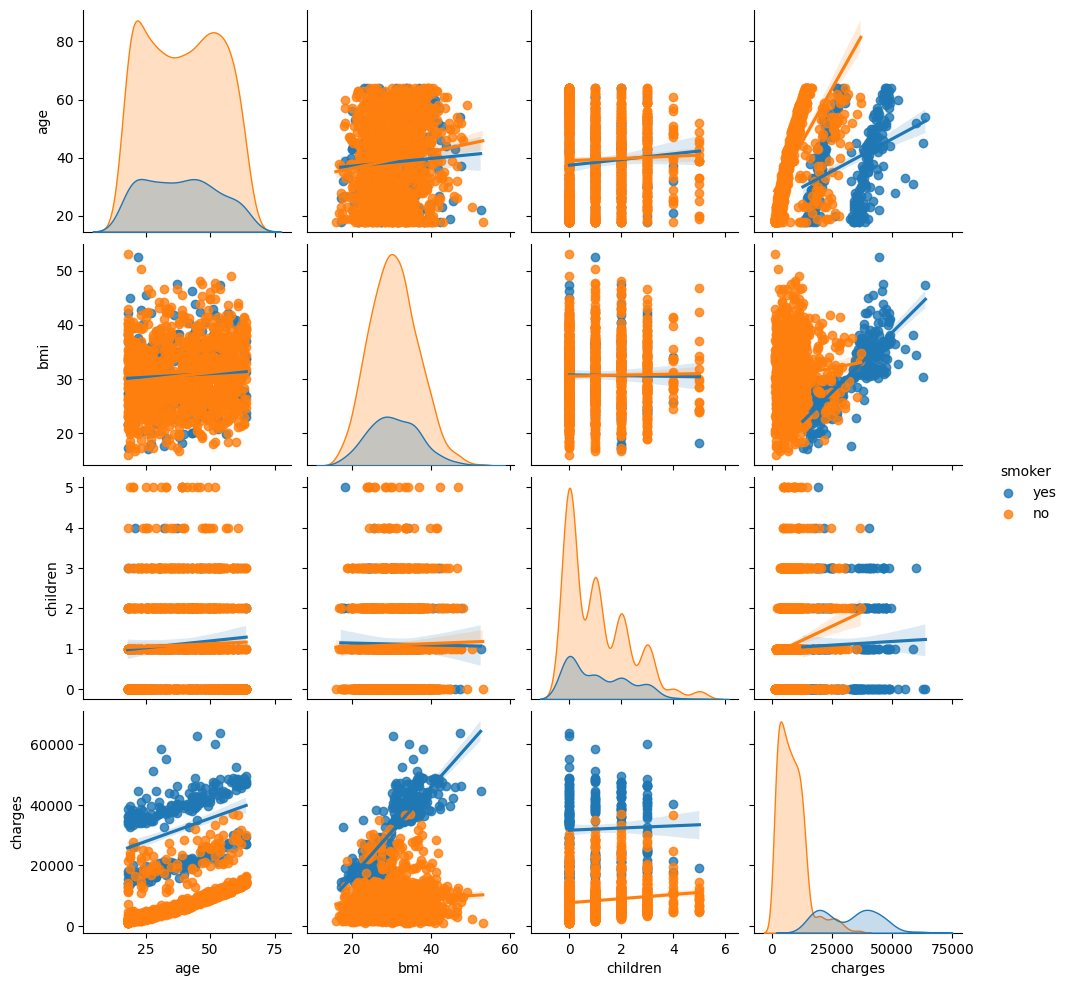

In [ ]:
#แบ่งตามการสูบบุหรี่
sns.pairplot(data=hc_cost,kind='reg',vars=num_col,hue='smoker')

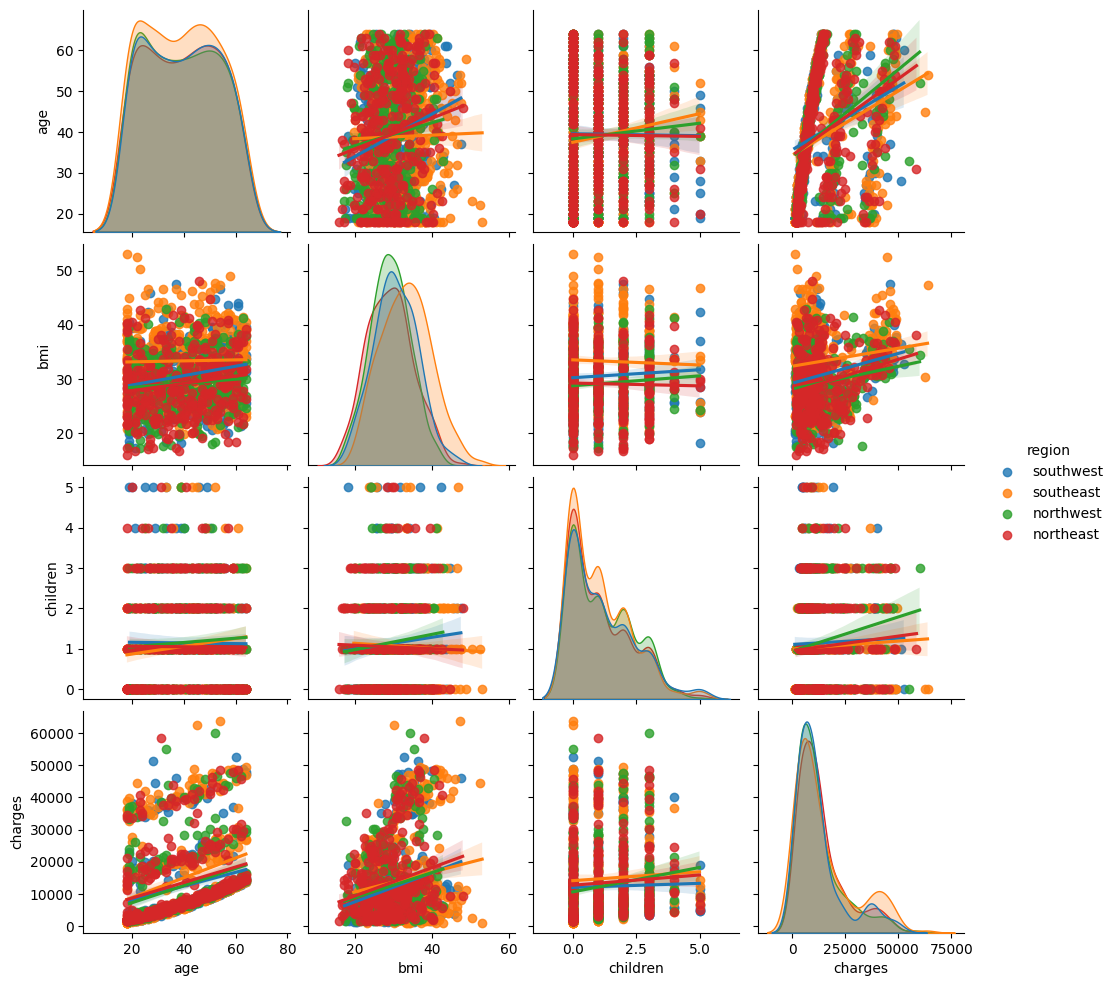

In [ ]:
#แบ่งตามที่อยู่
sns.pairplot(data=hc_cost,kind='reg',vars=num_col,hue='region')

### **ดูความสัมพันธ์ระหว่าง bmi กับ รายจ่าย(คำถาม)**

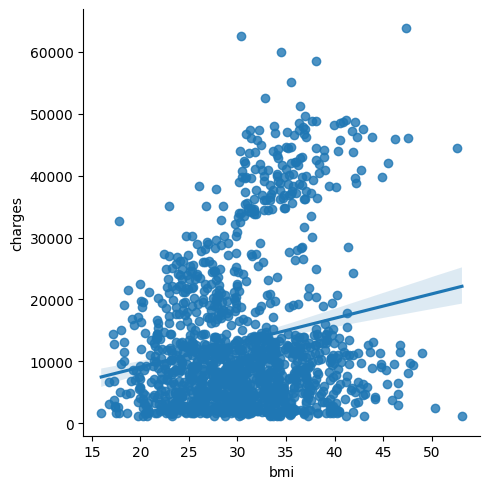

In [ ]:
sns.lmplot(x='bmi',y='charges',data=hc_cost)

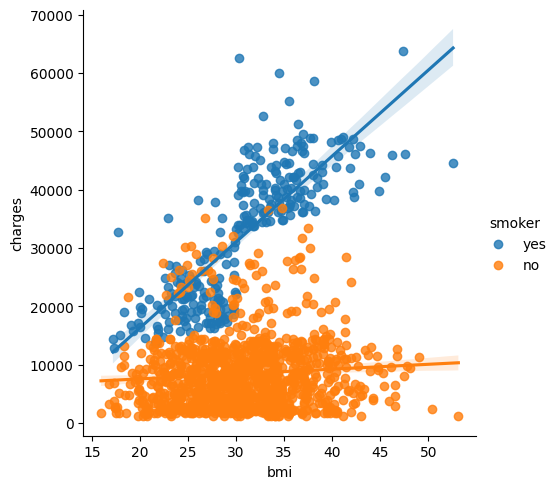

In [ ]:
sns.lmplot(x='bmi',y='charges',data=hc_cost,hue='smoker')

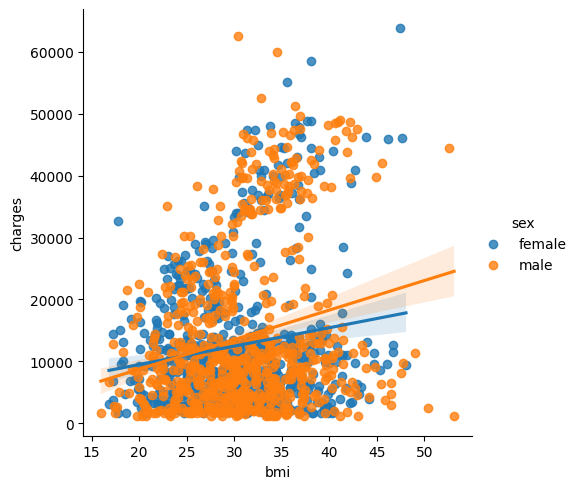

In [ ]:
sns.lmplot(x='bmi',y='charges',data=hc_cost,hue='sex')

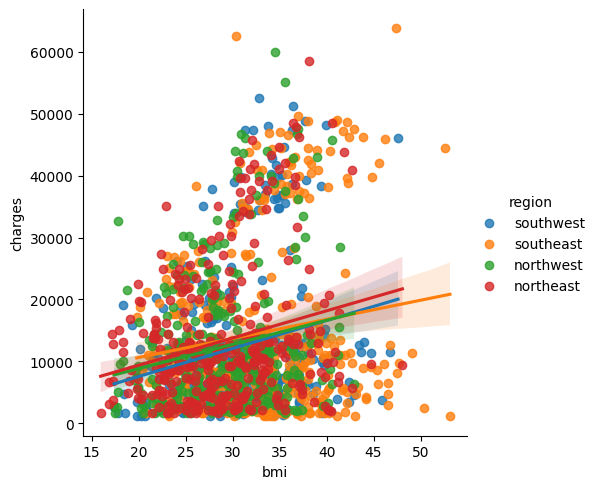

In [ ]:
sns.lmplot(x='bmi',y='charges',data=hc_cost,hue='region')

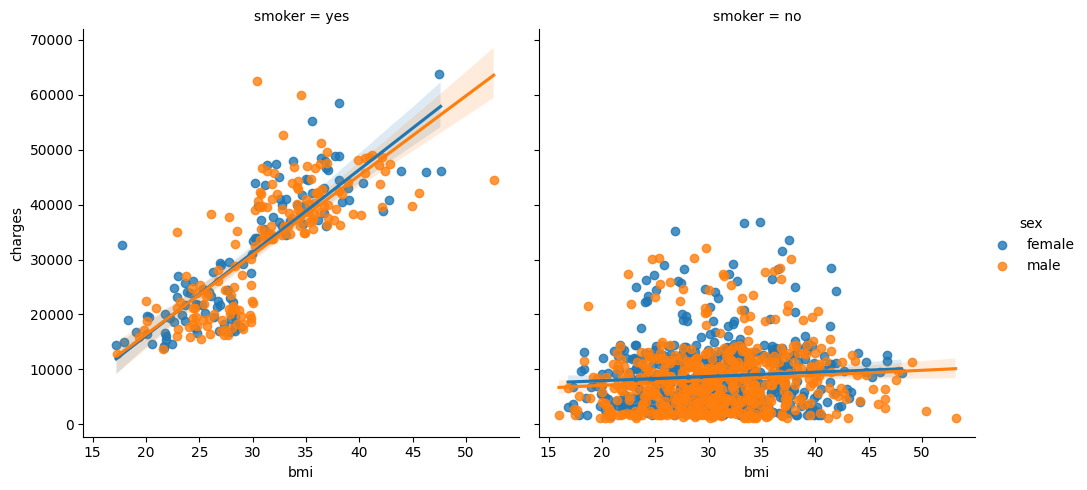

In [ ]:
sns.lmplot(x='bmi', y='charges', data=hc_cost, hue='sex', col='smoker')

### **ดูความสัมพันธ์ระหว่าง อายุ กับ รายจ่าย**

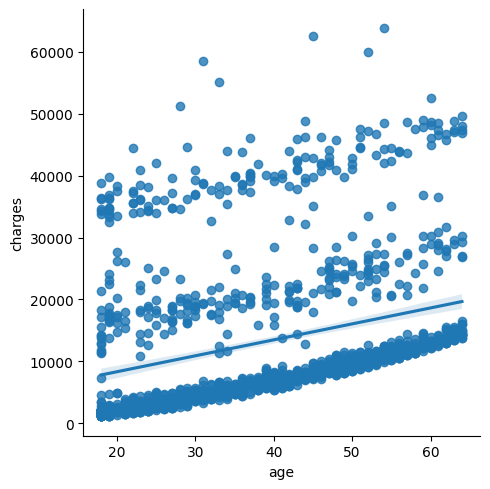

In [ ]:
sns.lmplot(x='age',y='charges',data=hc_cost)

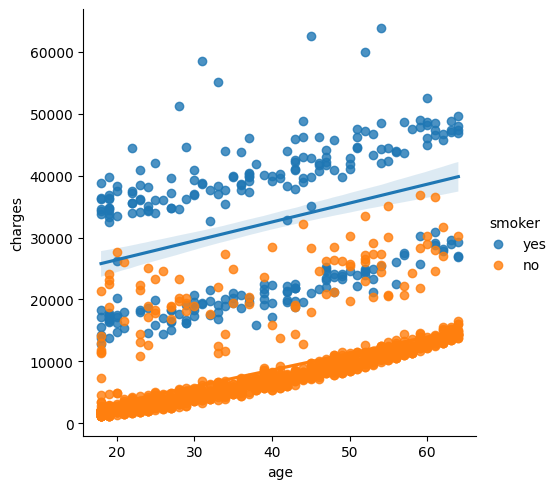

In [ ]:
sns.lmplot(x='age',y='charges',data=hc_cost,hue='smoker')

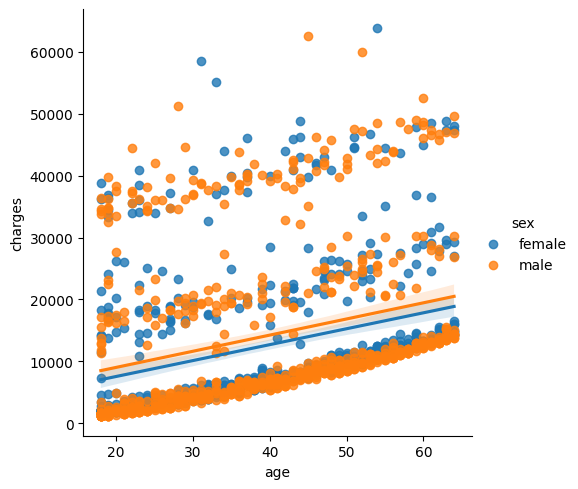

In [ ]:
sns.lmplot(x='age',y='charges',data=hc_cost,hue='sex')

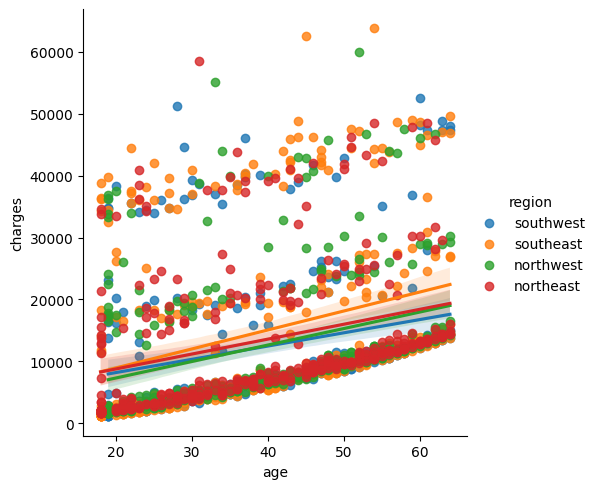

In [ ]:
sns.lmplot(x='age',y='charges',data=hc_cost,hue='region')

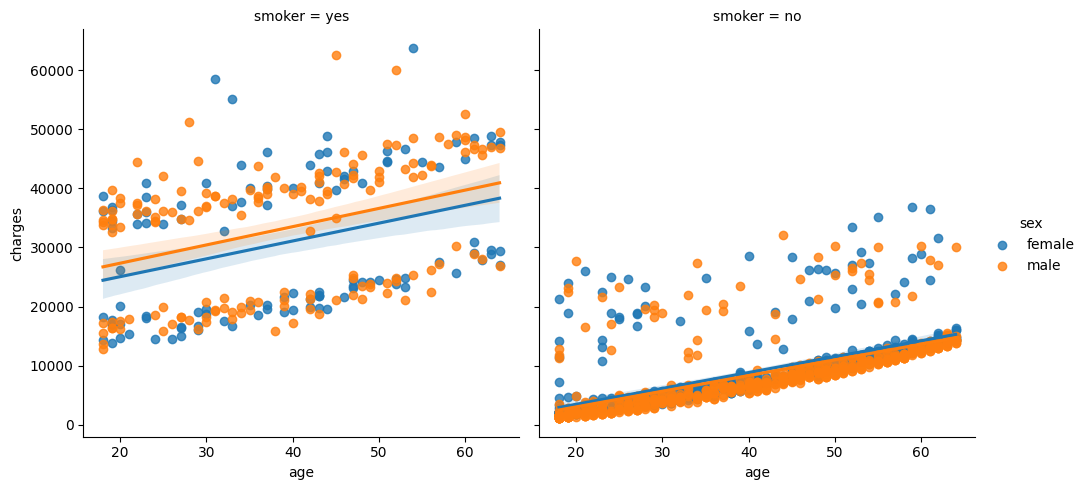

In [ ]:
sns.lmplot(x='age', y='charges', data=hc_cost, hue='sex', col='smoker')

### **อายุ และ BMI กับ รายจ่าย**

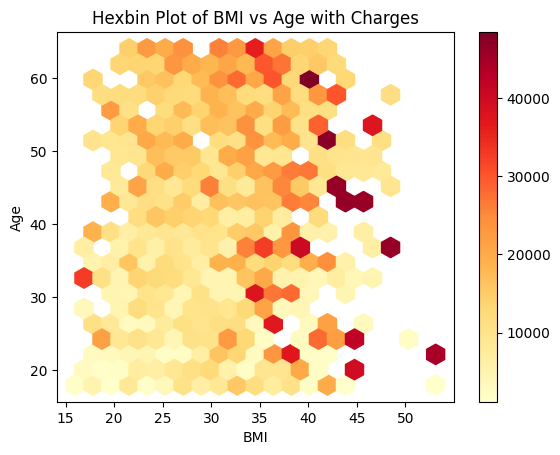

In [ ]:
# Create hexbin plot
plt.hexbin(x='bmi', y='age', C='charges', data=hc_cost, gridsize=20, cmap='YlOrRd')
plt.colorbar()

# Set axis labels and title
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Hexbin Plot of BMI vs Age with Charges')
plt.show()

In [ ]:
# # create separate dataframes for smokers and non-smokers
# smoker = hc_cost[hc_cost['smoker'] == 'yes']
# non_smoker = hc_cost[hc_cost['smoker'] == 'no']

# # create subplots with 1 row and 2 columns
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# # create hexbin plot for smokers
# hb_smoker = axs[0].hexbin(x=smoker['bmi'], y=smoker['age'], C=smoker['charges'],
#                           cmap='YlOrRd', gridsize=20)
# axs[0].set_xlabel('BMI')
# axs[0].set_ylabel('Age')
# axs[0].set_title('Smokers')

# # create hexbin plot for non-smokers
# hb_non_smoker = axs[1].hexbin(x=non_smoker['bmi'], y=non_smoker['age'],
#                               C=non_smoker['charges'], cmap='YlOrRd', gridsize=20)
# axs[1].set_xlabel('BMI')
# axs[1].set_ylabel('Age')
# axs[1].set_title('Non-smokers')

# # add colorbars
# cb1 = fig.colorbar(hb_smoker, ax=axs[0])
# cb2 = fig.colorbar(hb_non_smoker, ax=axs[1])
# cb1.set_label('Charges')
# cb2.set_label('Charges')

# plt.tight_layout()
# plt.show()

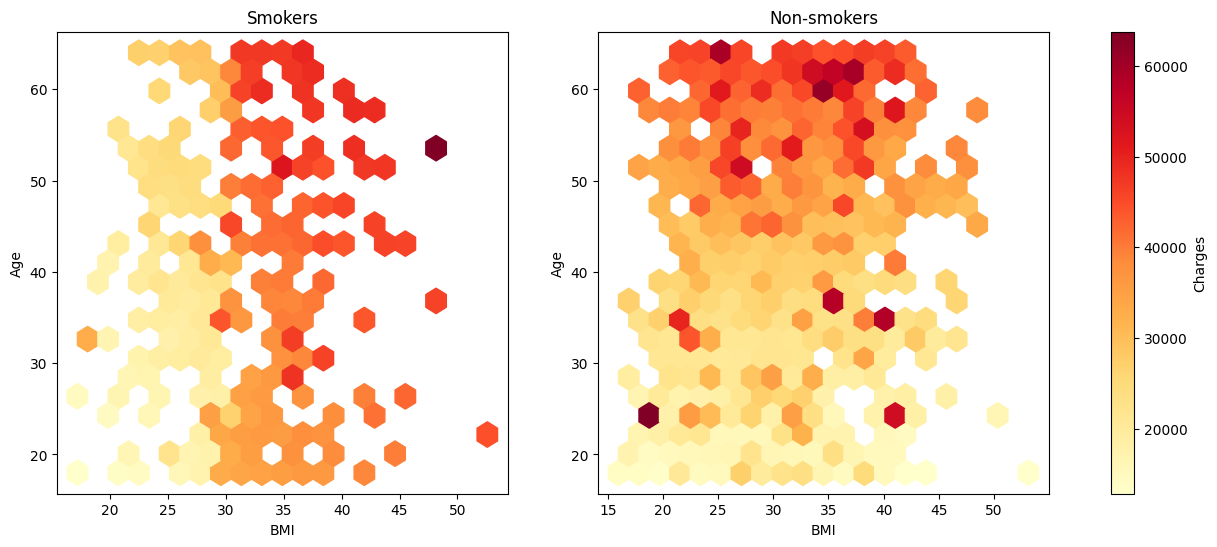

In [ ]:
# create separate dataframes for males and females
smoker = hc_cost[hc_cost['smoker'] == 'yes']
non_smoker = hc_cost[hc_cost['smoker'] == 'no']

# create figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# create hexbin plot for males
hb_smoker = ax1.hexbin(x=smoker['bmi'], y=smoker['age'], C=smoker['charges'],
                       gridsize=20,cmap='YlOrRd')
ax1.set_title('Smokers')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Age')

# create hexbin plot for females
hb_non_smoker = ax2.hexbin(x=non_smoker['bmi'], y=non_smoker['age'],
                           C=non_smoker['charges'], gridsize=20,cmap='YlOrRd')
ax2.set_title('Non-smokers')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Age')

# add colorbar
cbar = fig.colorbar(hb_smoker, ax=[ax1, ax2])
cbar.ax.set_ylabel('Charges')

plt.show()

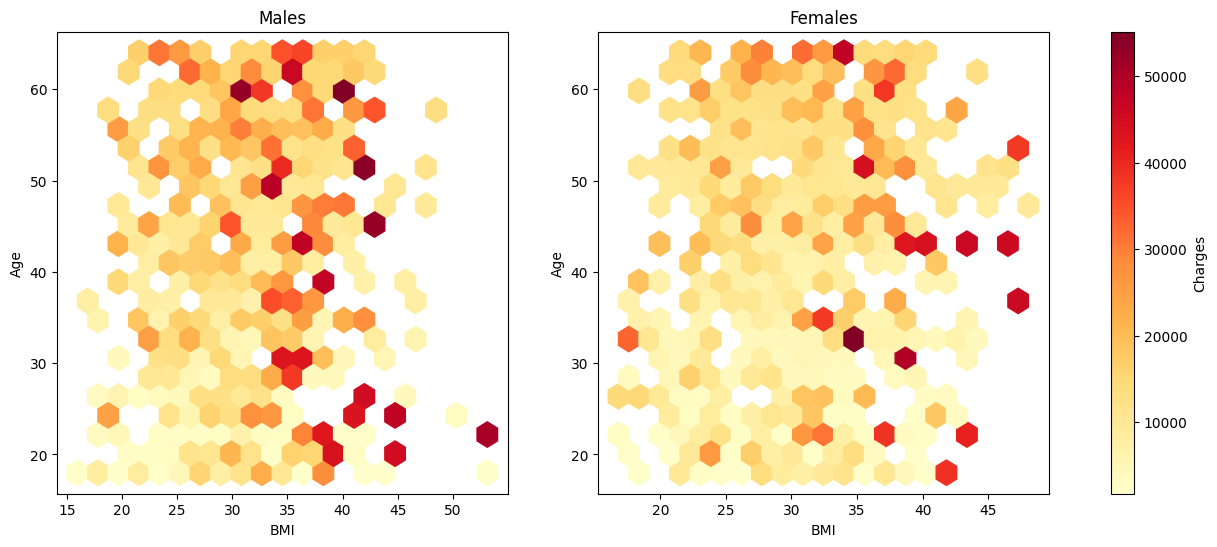

In [ ]:
# create separate dataframes for males and females
male = hc_cost[hc_cost['sex'] == 'male']
female = hc_cost[hc_cost['sex'] == 'female']

# create figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# create hexbin plot for males
hb1 = ax1.hexbin(x=male['bmi'], y=male['age'], C=male['charges'], gridsize=20,
                 cmap='YlOrRd')
ax1.set_title('Males')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Age')

# create hexbin plot for females
hb2 = ax2.hexbin(x=female['bmi'], y=female['age'], C=female['charges'], gridsize=20,
                 cmap='YlOrRd')
ax2.set_title('Females')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Age')

# add colorbar
cbar = fig.colorbar(hb2, ax=[ax1, ax2])
cbar.ax.set_ylabel('Charges')

plt.show()

### **จำนวนบุตรกับรายจ่าย**

<Axes: xlabel='children', ylabel='charges'>

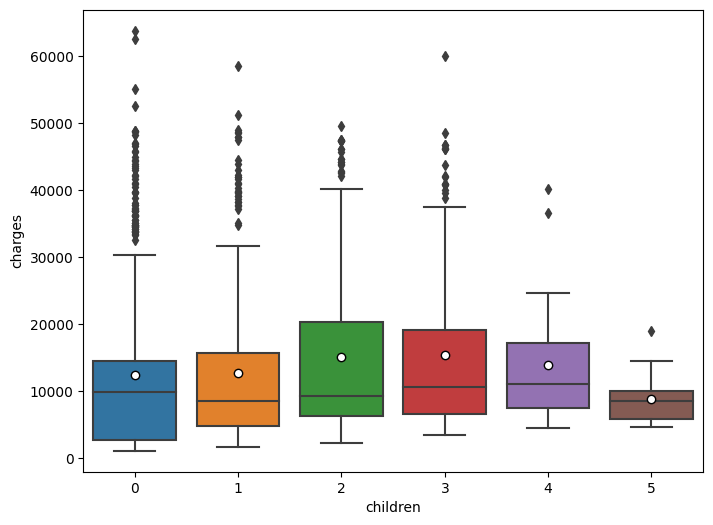

In [ ]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='children',y='charges',data=hc_cost,showmeans = True, meanprops = mean_type)

### **ที่อยู่กับรายจ่าย**

<Axes: xlabel='region', ylabel='charges'>

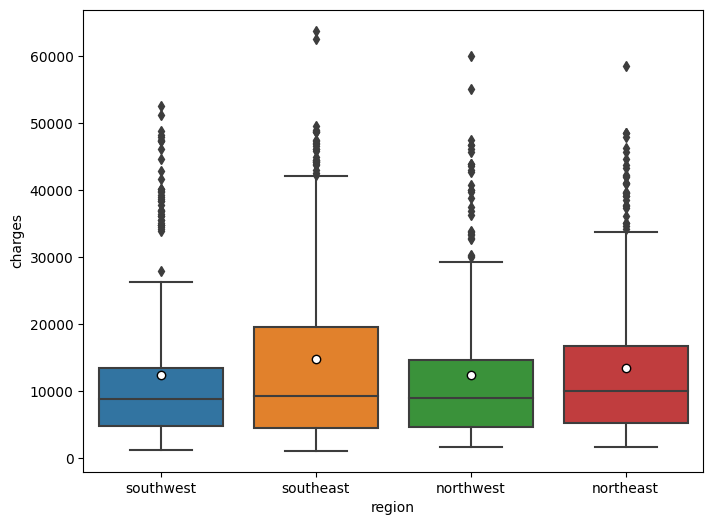

In [ ]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='region',y='charges',data=hc_cost,showmeans = True, meanprops = mean_type)

## **Prediction by PyCaret**

อ้างอิง :
1. [Pycaret Manual](https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation)

2. [Introduction to Regression in Python with PyCaret](https://towardsdatascience.com/introduction-to-regression-in-python-with-pycaret-d6150b540fc4)

In [ ]:
from pycaret.regression import *

**note** 📙

ตั้งค่าและใช้ normalize แบบ z-score ซึ่งเป็นรูปแบบพื้นฐานที่ให้มาของ Pycaret (ปรับได้) เพราะ feature มีการกระจายตัวค่อนข้างปกติ

ปรับ Train size เป็น 0.8

In [ ]:
num_col = list(hc_cost.select_dtypes(include="number").columns) #เอามาแต่ coloumn ที่เป็นตัวเลขใส่ลง list
num_col.remove("charges") #ลบ coloumn charges ออกจาก list เพราะเป็นเป้าหมาย
print(num_col)

['age', 'bmi', 'children']


In [ ]:
setup_df = setup(data=hc_cost, target='charges', normalize = True ,
                 numeric_features=num_col ,normalize_method = 'maxabs',
                 transform_target=True, train_size = 0.8 ,session_id = 555)

In [ ]:
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

โดยทั่วไป ค่า MAE, MSE, RMSE, RMSLE และ MAPE
ที่ต่ำกว่าบ่งชี้ถึงประสิทธิภาพของแบบจำลองที่ดีกว่า

ในขณะที่ค่า R2 ที่สูงขึ้นบ่งชี้ถึงประสิทธิภาพของแบบจำลองที่ดีกว่า

In [ ]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [ ]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=555)


In [ ]:
rf_reg = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

โดยพื้นฐานแล้ว CV folds จะใช้ค่า 10 แต่ถ้าอยากเปลี่ยนก็ปรับได้ เช่น

`create_model('dt', fold = 5)` คือการ Decision Tree ที่ใช้ 5 fold cross-validation

In [ ]:
print(rf_reg)

RandomForestRegressor(n_jobs=-1, random_state=555)


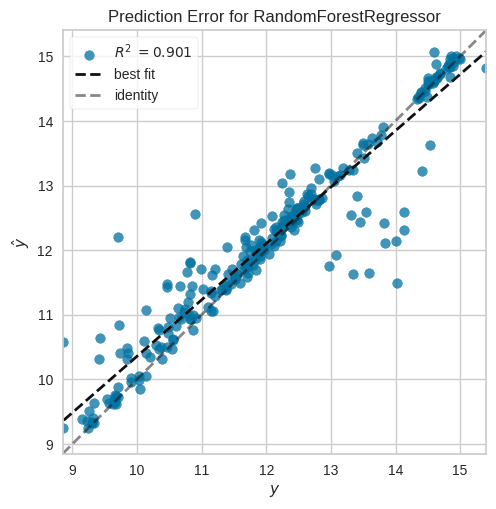

In [ ]:
plot_model(rf_reg, plot = 'error')

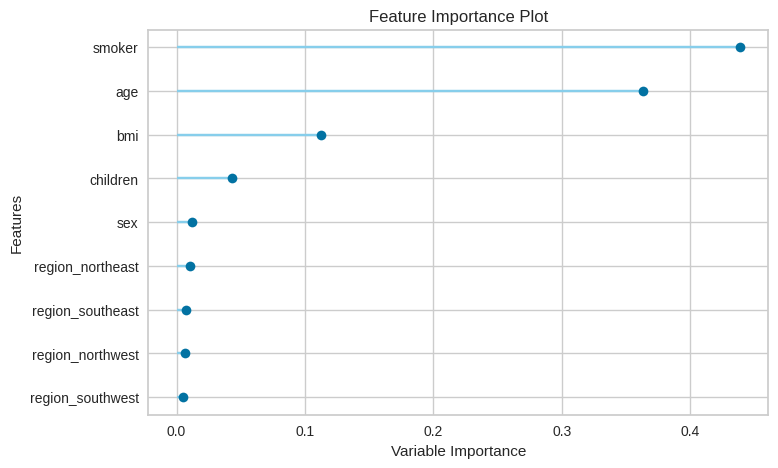

In [ ]:
plot_model(rf_reg, plot = 'feature')

### **Prediction**

In [ ]:
# predict on test set
data_pred = predict_model(rf_reg)

In [ ]:
data_pred.head(10)

age     sex        bmi  children smoker     region       charges  \
845   60  female  32.450001         0    yes  southeast  45008.957031   
520   50  female  27.360001         0     no  northeast  25656.576172   
285   46    male  26.620001         1     no  southeast   7742.109863   
337   62    male  27.549999         1     no  northwest  13937.666016   
31    18  female  26.315001         0     no  northeast   2198.189941   
249   29    male  28.975000         1     no  northeast   4040.558350   
673   41  female  31.020000         0     no  southeast   6185.320801   
421   61    male  35.860001         0    yes  southeast  46599.109375   
43    37  female  30.799999         2     no  southeast   6313.758789   
997   63  female  36.849998         0     no  southeast  13887.968750   

     prediction_label  
845      48746.061217  
520       9616.666375  
285       8927.030642  
337      18823.997360  
31        2222.708534  
249       6464.372849  
673       6309.043898  
421      47408.115852  
43        7262.429844  
997      14201.121852

In [ ]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 845 to 436
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               268 non-null    int8    
 1   sex               268 non-null    category
 2   bmi               268 non-null    float32 
 3   children          268 non-null    int8    
 4   smoker            268 non-null    category
 5   region            268 non-null    category
 6   charges           268 non-null    float32 
 7   prediction_label  268 non-null    float64 
dtypes: category(3), float32(2), float64(1), int8(2)
memory usage: 8.0 KB


In [ ]:
y_test = data_pred['charges']
y_predict = data_pred['prediction_label']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)
rmsle = mean_squared_log_error(y_test, y_predict)
mape = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

# Create a pandas dataframe to store the metrics
metrics = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'],
                        'Value': [mae, mse, rmse, r2, rmsle, mape]})

# Print the dataframe
display(metrics)

Metric         Value
0    MAE  1.858368e+03
1    MSE  1.585143e+07
2   RMSE  3.981385e+03
3     R2  9.095231e-01
4  RMSLE  8.982666e-02
5   MAPE  1.816803e+01

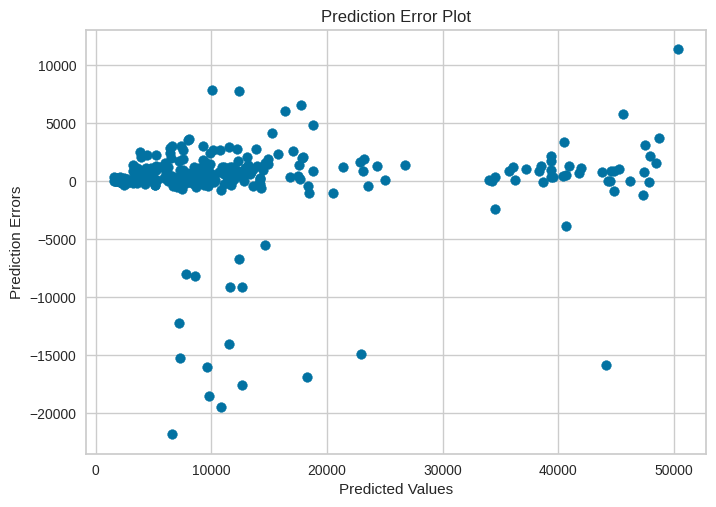

In [ ]:
# calculate prediction errors
errors = y_predict - y_test

# plot prediction errors
plt.scatter(y_predict, errors)
plt.xlabel('Predicted Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Error Plot')
plt.show()

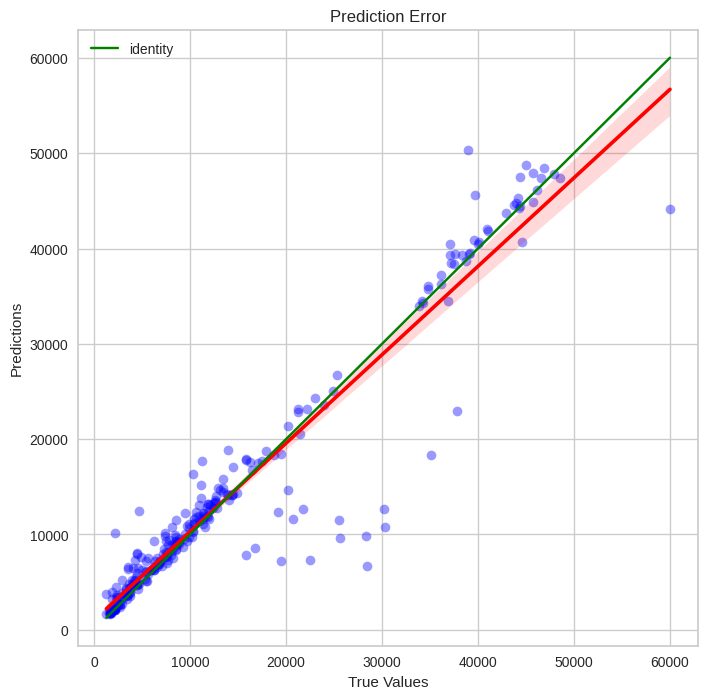

In [ ]:
# calculate prediction error
error = y_test - y_predict

# plot prediction error
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test, y=y_predict, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.4, 'color': 'blue'})
sns.lineplot(x=y_test, y=y_test, color='green', label='identity')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Error')

plt.legend()
plt.show()